In [1]:
# install.packages("pheatmap")  # falls noch nicht installiert

library(readxl)
library(dplyr)
library(pheatmap)

# üîÑ Excel-Datei laden
data_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA.xlsx"
df <- read_excel(data_path, sheet = "FINAL_final_final")


Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union


New names:
‚Ä¢ `SpCond_uSpercm` -> `SpCond_uSpercm...41`
‚Ä¢ `SpCond_uSpercm` -> `SpCond_uSpercm...42`


# heatmap all data 


üìä Verarbeite Fluss: Vestari_Joekulsa

Warning message in cor(numeric_vars, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"
üìä Verarbeite Fluss: Virkisa

Warning message in cor(numeric_vars, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"


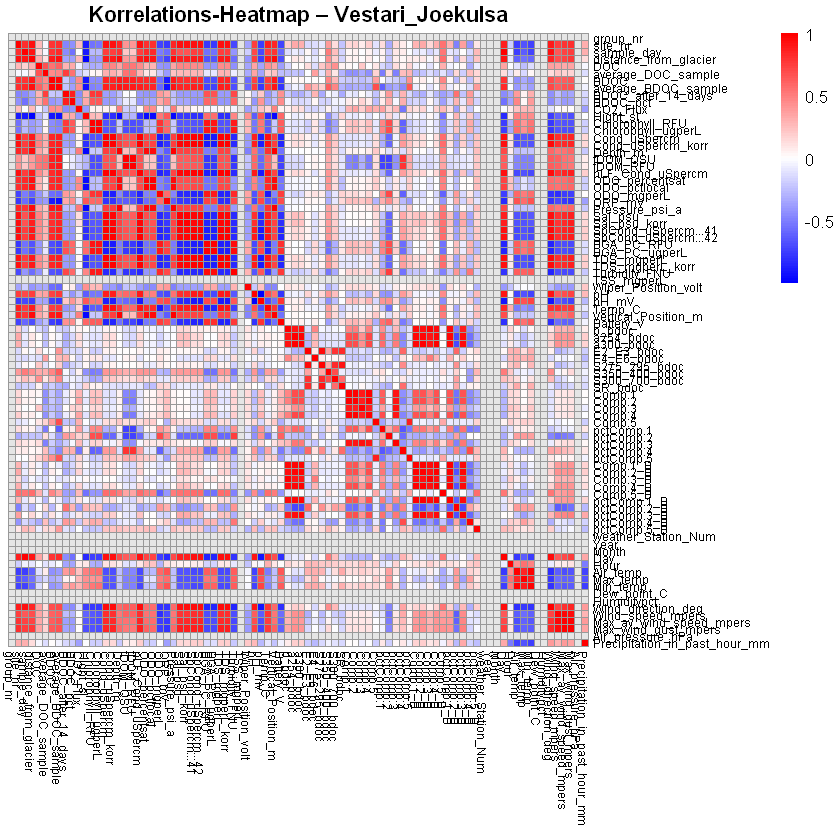

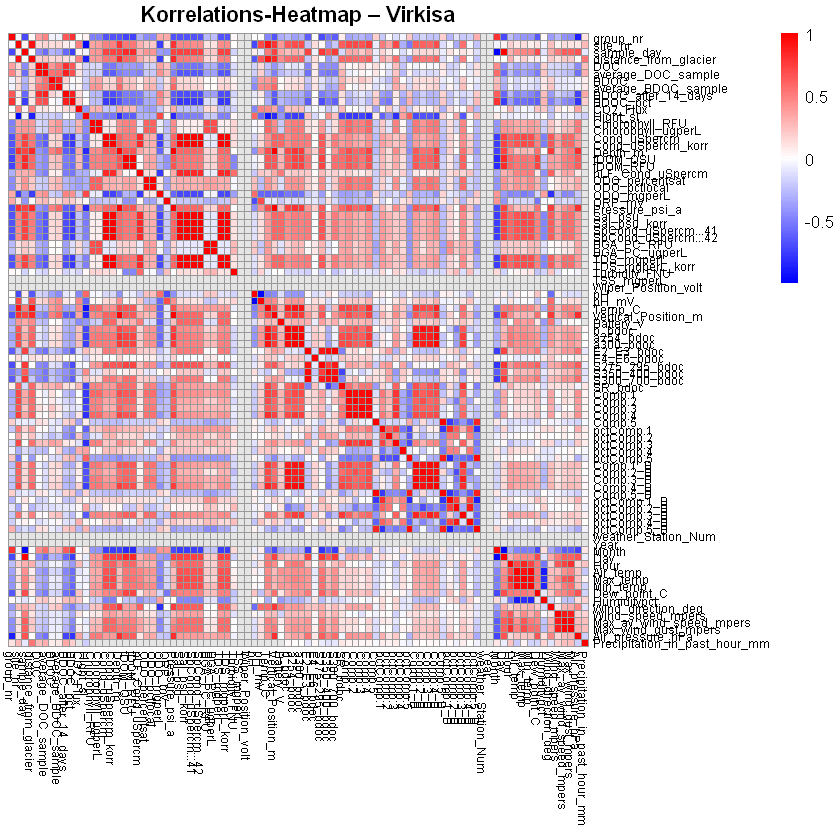

In [2]:


# Spaltennamen trimmen und sicherstellen, dass 'river_name' korrekt ist
colnames(df) <- trimws(colnames(df))
df$river_name <- trimws(as.character(df$river_name))

# Funktion zum Erstellen der Heatmap aller numerischen Parameter f√ºr einen Fluss
plot_full_corr_heatmap <- function(data, river_filter) {
  message("üìä Verarbeite Fluss: ", river_filter)

  df_river <- data %>% filter(river_name == river_filter)

  # Nur numerische Spalten ausw√§hlen
  numeric_vars <- df_river %>% select(where(is.numeric))

  # Pr√ºfen, ob gen√ºgend Daten vorhanden sind
  if (ncol(numeric_vars) < 2) {
    message("‚ö†Ô∏è Nicht gen√ºgend numerische Daten f√ºr: ", river_filter)
    return(NULL)
  }

  # Korrelation berechnen
  cor_matrix <- cor(numeric_vars, use = "pairwise.complete.obs")

  # Heatmap plotten
  pheatmap(
    cor_matrix,
    cluster_rows = FALSE,
    cluster_cols = FALSE,
    display_numbers = FALSE,
    number_format = "%.2f",
    color = colorRampPalette(c("blue", "white", "red"))(100),
    main = paste("Korrelations-Heatmap ‚Äì", river_filter),
    na_col = "grey90",
    fontsize_row = 7,
    fontsize_col = 7
  )
}

# üü¶ Heatmap f√ºr Vestari_Joekulsa
plot_full_corr_heatmap(df, "Vestari_Joekulsa")

# üü• Heatmap f√ºr Virkisa
plot_full_corr_heatmap(df, "Virkisa")


# Virkisa Group_nr 1

New names:
‚Ä¢ `SpCond_uSpercm` -> `SpCond_uSpercm...41`
‚Ä¢ `SpCond_uSpercm` -> `SpCond_uSpercm...42`
Warning message in cor(numeric_data, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"


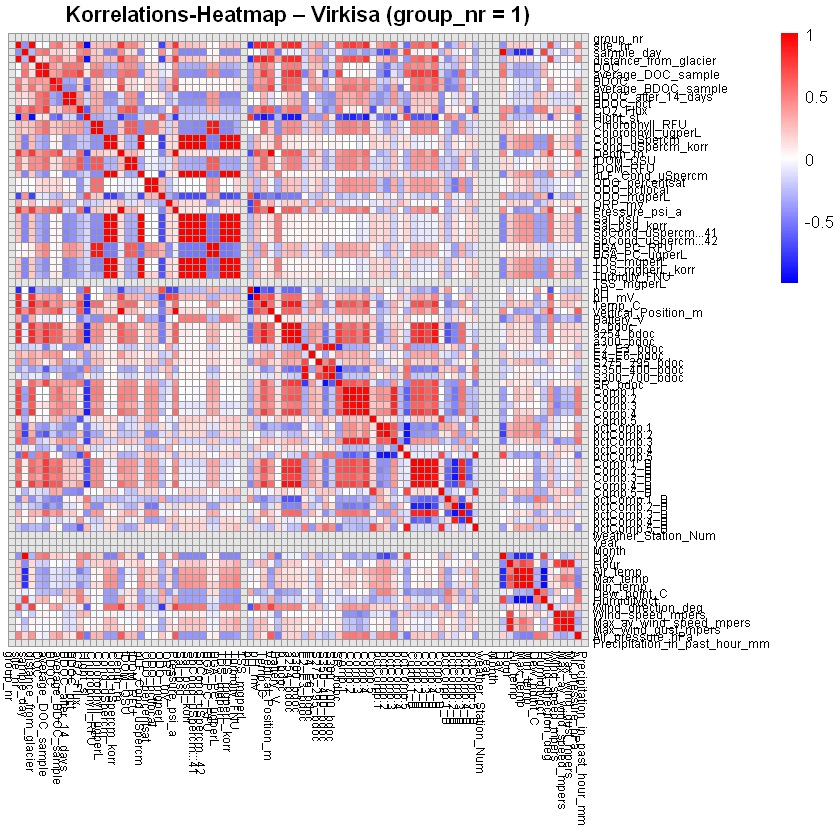

In [2]:
# üì¶ Pakete laden
library(readxl)
library(dplyr)
library(pheatmap)

# üì• Excel-Datei laden
data_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA.xlsx"
df <- read_excel(data_path, sheet = "FINAL_final_final")

# üîß Spaltennamen und Daten vorbereiten
colnames(df) <- trimws(colnames(df))
df$river_name <- trimws(as.character(df$river_name))
df$group_nr <- as.numeric(df$group_nr)

# üîé Nur Daten von Virkisa und group_nr == 1
df_filtered <- df %>%
  filter(river_name == "Virkisa", group_nr == 1)

# üìä Nur numerische Variablen ausw√§hlen
numeric_data <- df_filtered %>%
  select(where(is.numeric)) %>%
  select(where(~ sum(!is.na(.)) > 1))  # nur Variablen mit mind. 2 Werten

# ‚ùó Fehlerbehandlung: Pr√ºfen ob genug Daten vorhanden
if (ncol(numeric_data) < 2) {
  message("‚ö†Ô∏è Nicht gen√ºgend numerische Daten f√ºr Heatmap.")
} else {
  # üîÅ Korrelation berechnen
  cor_matrix <- cor(numeric_data, use = "pairwise.complete.obs")

  # üìà Heatmap anzeigen
  pheatmap(
    cor_matrix,
    cluster_rows = FALSE,
    cluster_cols = FALSE,
    display_numbers = FALSE,
    number_format = "%.2f",
    color = colorRampPalette(c("blue", "white", "red"))(100),
    main = "Korrelations-Heatmap ‚Äì Virkisa (group_nr = 1)",
    na_col = "grey90",
    fontsize_row = 7,
    fontsize_col = 7
  )
}


# Virkisa Group_nr >1

New names:
‚Ä¢ `SpCond_uSpercm` -> `SpCond_uSpercm...41`
‚Ä¢ `SpCond_uSpercm` -> `SpCond_uSpercm...42`
Warning message in cor(numeric_data, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"


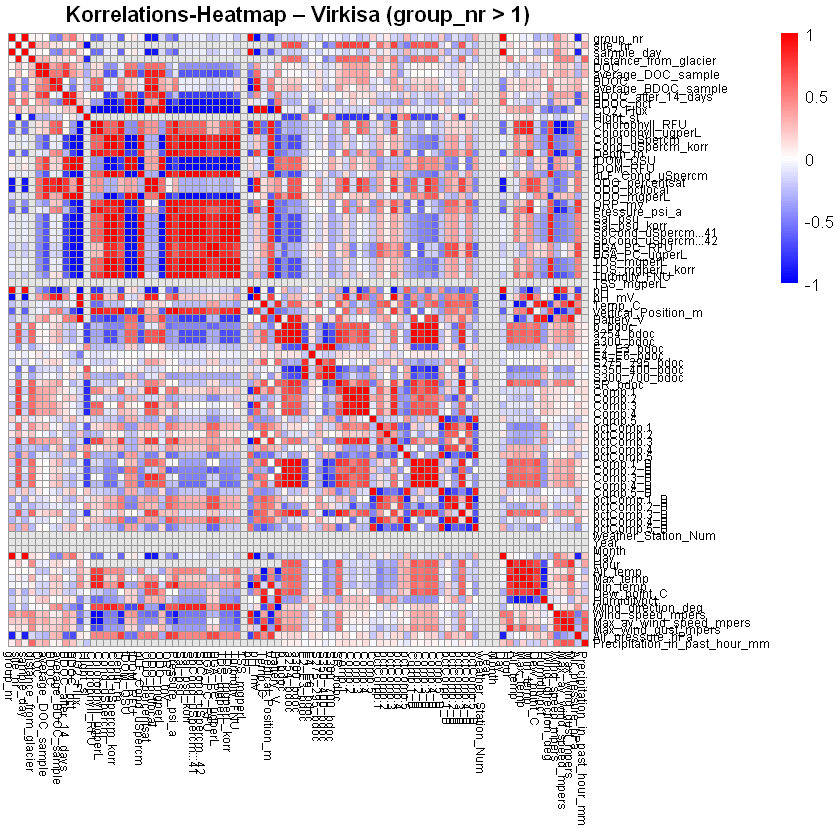

In [3]:
# üì¶ Pakete laden
library(readxl)
library(dplyr)
library(pheatmap)

# üì• Excel-Datei laden
data_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA.xlsx"
df <- read_excel(data_path, sheet = "FINAL_final_final")

# üîß Spalten bereinigen
colnames(df) <- trimws(colnames(df))
df$river_name <- trimws(as.character(df$river_name))
df$group_nr <- as.numeric(df$group_nr)

# üîé Filter: Virkisa & group_nr > 1
df_filtered <- df %>%
  filter(river_name == "Virkisa", group_nr > 1)

# üìä Nur numerische Variablen
numeric_data <- df_filtered %>%
  select(where(is.numeric)) %>%
  select(where(~ sum(!is.na(.)) > 1))

# ‚ùó Fehlerbehandlung
if (ncol(numeric_data) < 2) {
  message("‚ö†Ô∏è Nicht gen√ºgend numerische Daten f√ºr Heatmap.")
} else {
  cor_matrix <- cor(numeric_data, use = "pairwise.complete.obs")

  # üìà Heatmap anzeigen
  pheatmap(
    cor_matrix,
    cluster_rows = FALSE,
    cluster_cols = FALSE,
    display_numbers = FALSE,
    number_format = "%.2f",
    color = colorRampPalette(c("blue", "white", "red"))(100),
    main = "Korrelations-Heatmap ‚Äì Virkisa (group_nr > 1)",
    na_col = "grey90",
    fontsize_row = 7,
    fontsize_col = 7
  )
}


# SPEICHERN


In [5]:
# üì¶ Pakete laden
library(readxl)
library(dplyr)
library(pheatmap)
library(grid)

# üì• Excel-Datei laden
data_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA.xlsx"
output_dir <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Heatmaps_total_final"

df <- read_excel(data_path, sheet = "FINAL_final_final")
colnames(df) <- trimws(colnames(df))
df$river_name <- trimws(as.character(df$river_name))
df$group_nr <- as.numeric(df$group_nr)

# üîÅ Neue Funktion mit Filterausdruck und flexiblem Dateinamen
save_corr_heatmap_png <- function(data, filter_expr, title_suffix, filename_suffix) {
  df_filtered <- data %>% filter(!!rlang::parse_expr(filter_expr))

  numeric_vars <- df_filtered %>% select(where(is.numeric)) %>%
    select(where(~ sum(!is.na(.)) > 1))

  if (ncol(numeric_vars) < 2 || nrow(numeric_vars) < 2) {
    message("‚ö†Ô∏è Nicht gen√ºgend numerische Daten f√ºr: ", title_suffix)
    return(NULL)
  }

  cor_matrix <- cor(numeric_vars, use = "pairwise.complete.obs")

  p <- pheatmap(
    cor_matrix,
    cluster_rows = FALSE,
    cluster_cols = FALSE,
    display_numbers = FALSE,
    number_format = "%.2f",
    color = colorRampPalette(c("blue", "white", "red"))(100),
    main = paste("Korrelations-Heatmap ‚Äì", title_suffix),
    na_col = "grey90",
    fontsize_row = 7,
    fontsize_col = 7,
    silent = TRUE
  )

  file_path <- file.path(output_dir, paste0("Heatmap_", filename_suffix, ".png"))
  png(file_path, width = 2000, height = 1800, res = 250)
  grid::grid.newpage()
  grid::grid.draw(p$gtable)
  dev.off()

  message("‚úÖ PNG gespeichert unter: ", file_path)
}

# üî∑ Vestari_Joekulsa komplett
save_corr_heatmap_png(df, 'river_name == "Vestari_Joekulsa"', "Vestari_Joekulsa", "Vestari_Joekulsa")

# üî∂ Virkisa komplett
save_corr_heatmap_png(df, 'river_name == "Virkisa"', "Virkisa", "Virkisa")

# üü¢ Virkisa group_nr == 1
save_corr_heatmap_png(df, 'river_name == "Virkisa" & group_nr == 1', "Virkisa (group_nr = 1)", "Virkisa_group1")

# üü° Virkisa group_nr > 1
save_corr_heatmap_png(df, 'river_name == "Virkisa" & group_nr > 1', "Virkisa (group_nr > 1)", "Virkisa_group_gt1")


New names:
‚Ä¢ `SpCond_uSpercm` -> `SpCond_uSpercm...41`
‚Ä¢ `SpCond_uSpercm` -> `SpCond_uSpercm...42`
Warning message in cor(numeric_vars, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"
‚úÖ PNG gespeichert unter: C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Heatmaps_total_final/Heatmap_Vestari_Joekulsa.png

Warning message in cor(numeric_vars, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"
‚úÖ PNG gespeichert unter: C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Heatmaps_total_final/Heatmap_Virkisa.png

Warning message in cor(numeric_vars, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"
‚úÖ PNG gespeichert unter: C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Heatmaps_total_final/Heatmap_Virkisa_group1.png

Warning message in cor(numeric_vars, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"
‚úÖ PNG gespeichert unter: C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINA

# ----------------------------------------------------------------------------